# Investigating Fandango Movie Ratings

## Is Fandango Still Inflating Ratings?

In October 2015, Walt Hickey from *FiveThirtyEight* published a [popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence which suggests that Fandango's movie rating system was biased and dishonest.

In this project, we'll analyse more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

We'll compare two datasets of Fandango movie ratings: one was collected previous to Hickey's analysis, while the other was collected after.

Let's start by reading in the two datasets and getting familiar with their structures.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid displaying truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Below we isolate the columns that offer information about Fandango's ratings in separate variables.

In [3]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [4]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


To be considered representative, the population of interest for our analysis should contain any movie ratings stored on Fandango's website, regardless of the releasing year.

From accessing the two `README.md` files through [this link](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) and [this link](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), we can see that sampling was not random because not every movie had the same chance to be included in the samples, mostly because these samples are subject to *temporal trends*, being both samples unlikely to be representative of our population of interest.


## Changing the Goal of our Analysis

At this point, we decided to alter the goal of our analysis by placing some limitations on it.

Instead of trying to find any changes in Fandango's rating system after Hickey's analysis, our new goal is trying to find any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.


## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria is movie popularity, our second sample doesn't provide information about the number of fan ratings, and this raises representativity issues once again.

One quick way to check the representativity of this dataset is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website.

In [5]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


These are the fan ratings found on Fandango's website in April 2018:

| Movie                                   | Fan ratings |
|-----------------------------------------|-------------|
| Mechanic: Resurrection                  | 2247        |
| Warcraft                                | 7271        |
| Max Steel                               | 493         |
| Me Before You                           | 5263        |
| Fantastic Beasts and Where to Find Them | 13400       |
| Cell                                    | 17          |
| Genius                                  | 127         |
| Sully                                   | 11877       |
| A Hologram for the King                 | 500         |
| Captain America: Civil War              | 35057       |


90% of the movies in our sample are popular. That is enough to move forward with a bit more confidence.

Let's also double-check the other dataset for popular movies, remembering that a popular movie is one with at least 30 fan ratings.

In [6]:
sum(fandango_previous['Fandango_votes'] < 30)

0

Exploring the datasets, we notice that some movies were not released in 2015 and 2016.

In [7]:
# Checking for release year different than 2015
fandango_previous.tail(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [8]:
# Checking for release year different than 2016
fandango_after['year'].unique()

array([2016, 2017])

For our purposes, we need to isolate only the sample points that belong to our populations of interest.

Let's start with Hickey's dataset and isolate only the movies released in 2015. There's no column for the release year, but we can to extract it from the strings in the `FILM` column.

In [9]:
# Extracting the release years to a new column
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]

# Checking if the new column was created as expected
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


Let's check the unique values for the `Year` column and then isolate the movies released in 2015 in a separate dataset.

In [10]:
fandango_previous['Year'].unique()

array(['2015', '2014'], dtype=object)

In [11]:
# Dataset only for movies released in 2015
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()

# Double-checking unique values for the Year column
fandango_2015['Year'].unique()

array(['2015'], dtype=object)

Now let's isolate the movies in the other dataset.

In [12]:
# Dataset only for movies released in 2016 
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()

# Double-checking unique values for the year column
fandango_2016['year'].unique()

array([2016])

## Comparing Distribution Shapes for 2015 and 2016

Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

We'll start making a comparison between the shapes of the distributions of movie ratings for both samples.

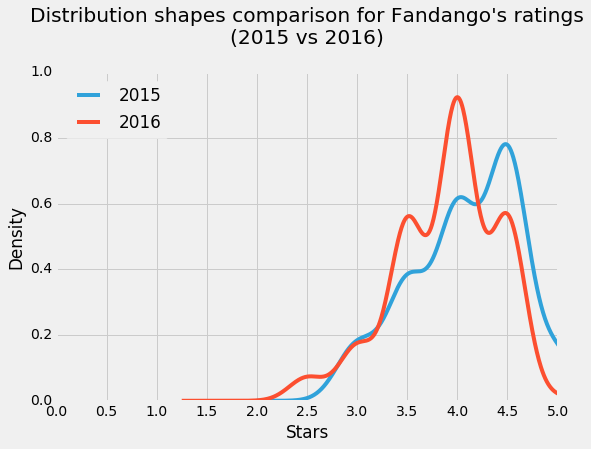

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,5.5))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Distribution shapes comparison for Fandango's ratings\n(2015 vs 2016)", y=1.07)
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()

There are two notable aspects on the figure above:

- Both distributions are strongly left-skewed which suggests that movies on Fandango are given mostly high and very high fan ratings.


- The 2016 distribution is slightly shifted to the left compared to the 2015 distribution. This suggests there was a clear difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

In [14]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables and
                                # avoid silly mistakes as we read them
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
print('2016' + '\n' + '-' * 16)                              
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There is a clear difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change

Let's take a couple of summary metrics to get a more precise picture of the direction of the difference. We'll compute the mean, the median and the mode for both distributions, and then use a bar graph to plot the values.

In [16]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


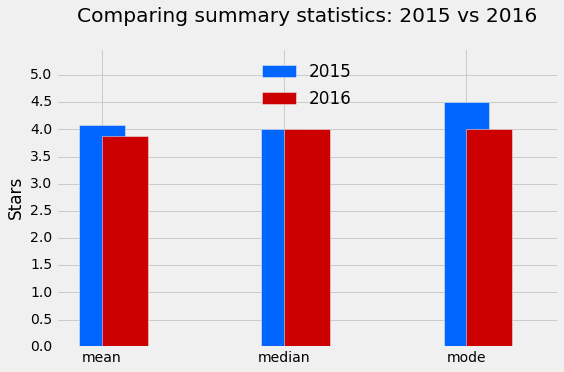

In [17]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color='#0066FF', align='center', label='2015', width=0.25)
summary['2016'].plot.bar(color='#CC0000', align='edge', label='2016', width=0.25,
                        rot=0,figsize=(8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha=0, loc='upper center')
plt.show()

The mean rating was lower in 2016 by approximately 0.2, which means a fall of nearly 5% compared to the mean rating in 2015.

In [18]:
(summary.loc['mean', '2015'] - summary.loc['mean', '2016']) / summary.loc['mean', '2015']

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. 

The mode together with the mean confirm the direction of the difference seen on the kernel density plot: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.


## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure about the reason for the change, but it possibly was caused by Fandango fixing their biased rating system after Hickey's analysis.